In [19]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

In [20]:
np.random.seed(0)

In [21]:
N = 100
mu = 0.2
sigma = 1
x = np.random.randn(N)*sigma + mu

In [22]:
# two-sided test
ztest(x)

(2.5648404153513686, 0.01032232684881584)

In [23]:
# two-sided test
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat / (sigma_hat / np.sqrt(N)) # our mu0 = 0
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(2.564840415351368, 0.010322326848815901)

In [24]:
### Alternate calculation
mu_hat = x.mean()
v_hat = x.var(ddof=1) / N
z = mu_hat / np.sqrt(v_hat) # our mu0 = 0
p = 2 * norm.sf(np.abs(z))
z, p

(2.5648404153513686, 0.01032232684881584)

In [25]:
# Note: you can use norm.sf instead of 1 - norm.cdf

In [26]:
# one-sided test
ztest(x, alternative='larger')

(2.5648404153513686, 0.00516116342440792)

In [27]:
# one-sided test
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat / (sigma_hat / np.sqrt(N)) # our mu0 = 0
p = 1 - norm.cdf(z)
z, p

(2.564840415351368, 0.005161163424407977)

In [28]:
# null under a different reference value
mu0 = 0.2
ztest(x, value=mu0)

(0.5904283402851699, 0.5549035151647227)

In [29]:
# null under a different reference value
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = (mu_hat - mu0) / (sigma_hat / np.sqrt(N))
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(0.5904283402851698, 0.5549035151647228)

In [30]:
# two-sample test
N0 = 100
mu0 = 0.2
sigma0 = 1
x0 = np.random.randn(N)*sigma0 + mu0

N1 = 100
mu1 = 0.5
sigma1 = 1
x1 = np.random.randn(N)*sigma1 + mu1

In [31]:
ztest(x0, x1)

(-1.1234612344369315, 0.2612416557056353)

In [32]:
# two-sample test implementation
mu_hat0 = x0.mean()
mu_hat1 = x1.mean()
dmu_hat = mu_hat1 - mu_hat0
s2_hat0 = x0.var(ddof=1)
s2_hat1 = x1.var(ddof=1)
s_hat = np.sqrt(s2_hat0 / N0 + s2_hat1 / N1)
z = dmu_hat / s_hat # reference value is 0
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(1.1234612344369315, 0.26124165570563523)

In [33]:
# show that we will reject the null hypothesis when the
# null hypothesis is true (false alarm) 5% of the time
num_tests = 10000
results = np.zeros(num_tests)
for i in range(num_tests):
  x1 = np.random.randn(100)
  x2 = np.random.randn(100)
  z, p = ztest(x1, x2)
  results[i] = (p < 0.05)
print(results.mean())

0.049


In [34]:
!wget https://lazyprogrammer.me/course_files/titanic_train.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('titanic_train.csv')

FileNotFoundError: [Errno 2] File titanic_train.csv does not exist: 'titanic_train.csv'

In [37]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df[df['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
x1 = df[df['Survived'] == 1]['Fare'].dropna().to_numpy()

In [ ]:
x2 = df[df['Survived'] == 0]['Fare'].dropna().to_numpy()

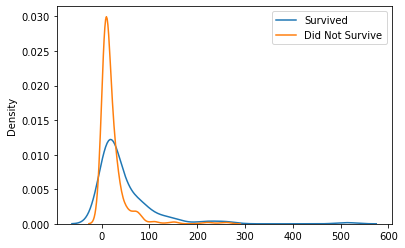

In [ ]:
sns.kdeplot(x1, label='Survived')
sns.kdeplot(x2, label='Did Not Survive')
plt.legend();

In [ ]:
x1.mean(), x2.mean()

(48.39540760233918, 22.117886885245902)

In [ ]:
ztest(x1, x2)

(7.939191660871055, 2.035031103573989e-15)